<a href="https://colab.research.google.com/github/Steven-Macas/kmeans_COD/blob/main/cod_aprendizaje_automatico_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***APRENDIZAJE AUTOMÁTICO***

---



***NO SUPERVISADO***

◦ Este dataset contiene datos sobre el comportamiento de una serie de jugadores de Call of Duty.

## ***Librerías***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder

## **Cargar DataSet y primera vista**

In [9]:
df = pd.read_csv('cod.csv', index_col='name');

In [10]:
df.tail()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
name,,,,,,,,,,,,,,,,,,
ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0
TomasFJ_05#2711069,1,35,0.686275,3,5,1,110,17,10,6,10.0,1,11,63,17126,39.0,80,51


In [11]:
df.dtypes

wins                int64
kills               int64
kdRatio           float64
killstreak          int64
level               int64
losses              int64
prestige            int64
hits                int64
timePlayed          int64
headshots           int64
averageTime       float64
gamesPlayed         int64
assists             int64
misses              int64
xp                  int64
scorePerMinute    float64
shots               int64
deaths              int64
dtype: object

## ***Preprocesar los datos***

In [12]:
df.isnull().sum()

wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [13]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


<Axes: >

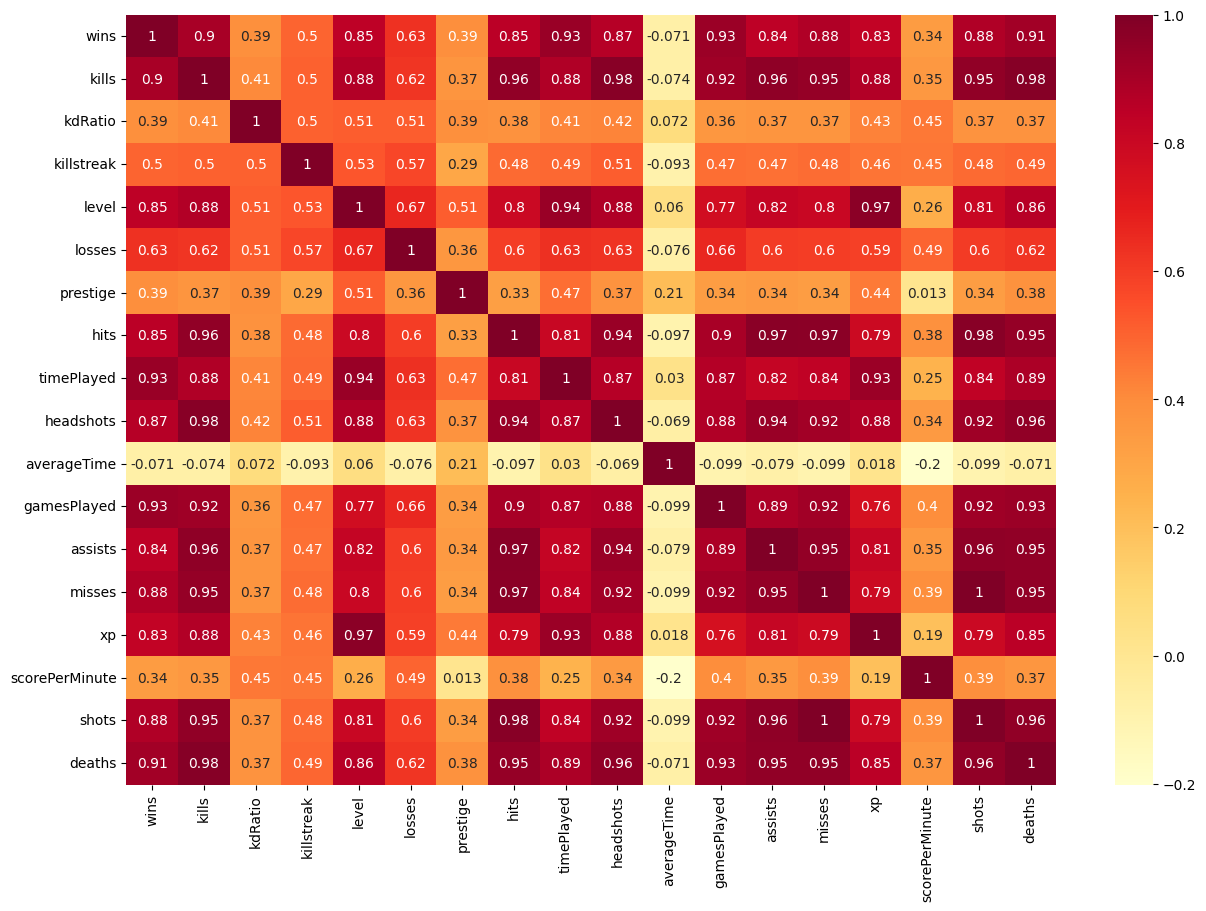

In [15]:
# Calcular la correlación entre las variables del DataFrame
corr = df.corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap = 'YlOrRd', annot = True)

## ***Escalar y detectar OutLiers***

In [ ]:
# Elegimos las variables con mayor correlación con la variable objetivo y las que menos se relacionen entre sí
#relevant_variables = []

<ipython-input-16-b5273d12130e>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.columns].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'wins'}>,
        <Axes: title={'center': 'kills'}>,
        <Axes: title={'center': 'kdRatio'}>,
        <Axes: title={'center': 'killstreak'}>],
       [<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'losses'}>,
        <Axes: title={'center': 'prestige'}>,
        <Axes: title={'center': 'hits'}>],
       [<Axes: title={'center': 'timePlayed'}>,
        <Axes: title={'center': 'headshots'}>,
        <Axes: title={'center': 'averageTime'}>,
        <Axes: title={'center': 'gamesPlayed'}>],
       [<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'misses'}>,
        <Axes: title={'center': 'xp'}>,
        <Axes: title={'center': 'scorePerMinute'}>],
       [<Axes: title={'center': 'shots'}>,
        <Axes: title={'center': 'deaths'}>, <Axes: >, <Axes: >]],
      dtype=object)

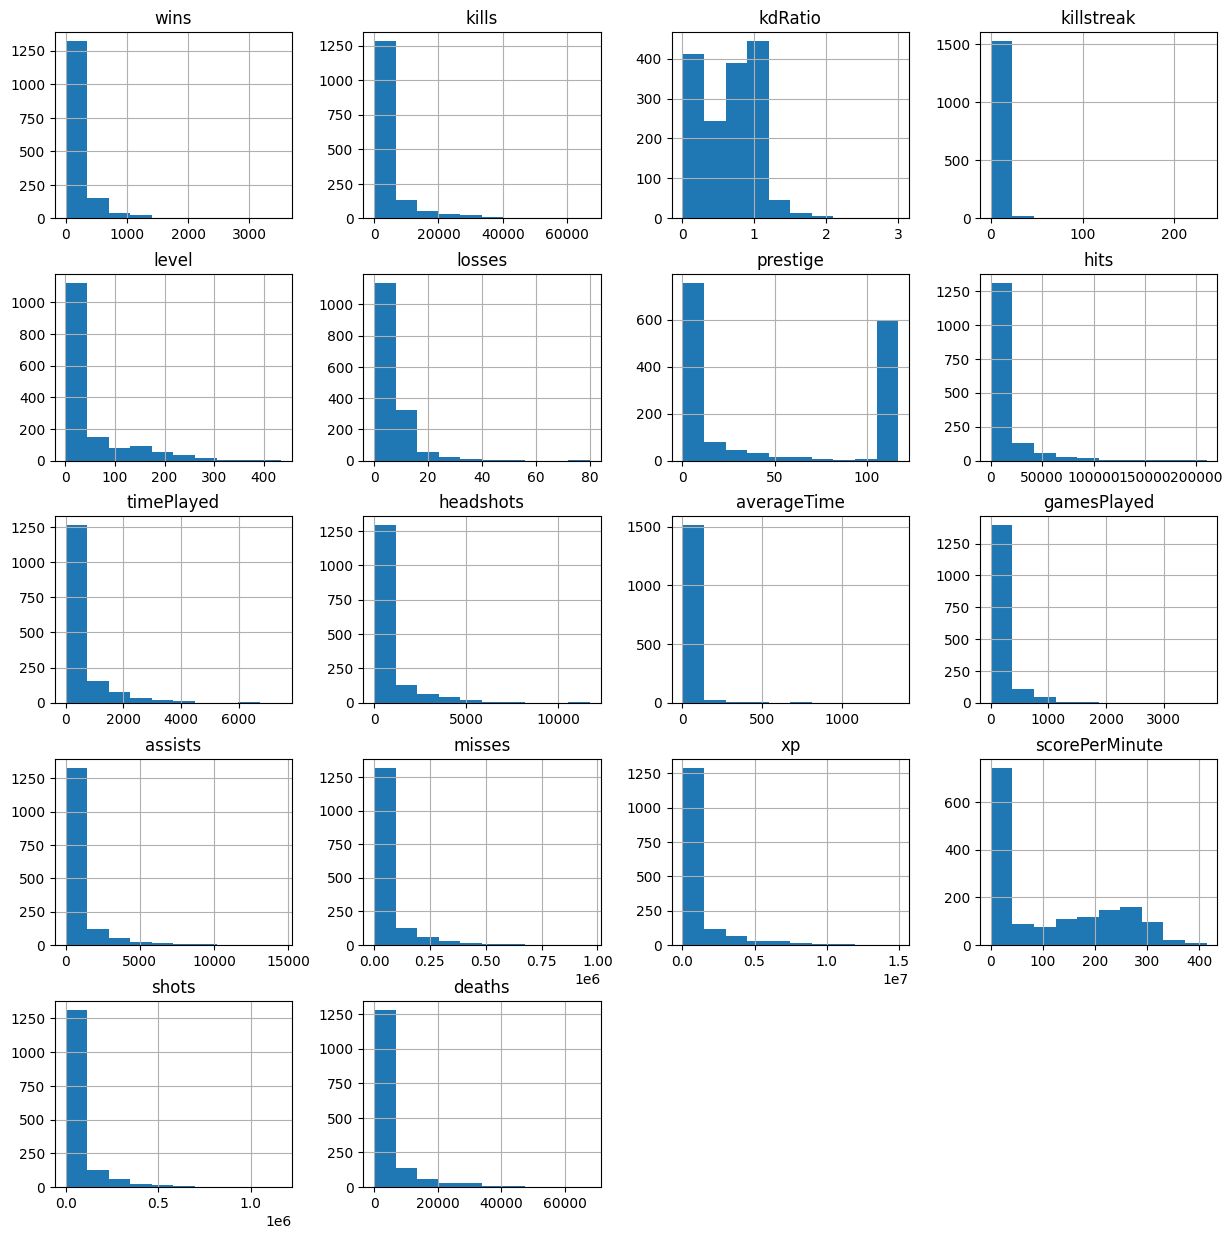

In [16]:
df[df.columns].hist(ax = plt.figure(figsize = (15, 15)).gca())

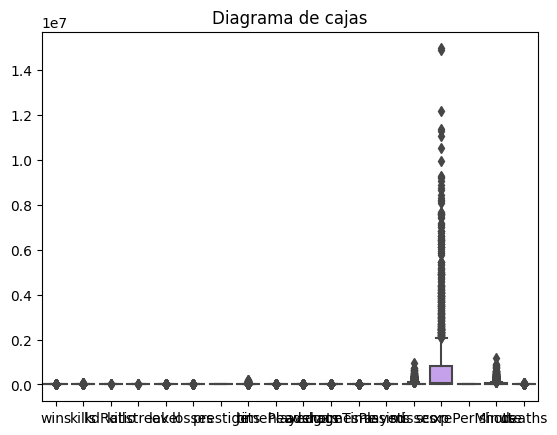

In [17]:
# Verificamos si es necesario escalar las variables
sns.boxplot(df)
plt.title('Diagrama de cajas')
plt.show()

el diagrama de cajas se utiliza para verificar si es necesario escalar las variables de los datos. Si se observan valores atípicos en el diagrama de cajas, podría ser necesario escalar las variables para reducir el efecto de estos valores extremos en el análisis posterior

In [18]:
import seaborn as sns

# mediante esta función de pueden visualizar los 'outliers'
def draw_hist_boxplot(df, feature_name):
  # se dibuja el diagrama de cajas
  sns.boxplot(x = feature_name, data = df)
  # se dibujan sobre el diagrama todos los puntos de datos que tiene la propiedad
  sns.stripplot(x = feature_name, data = df, color = "#474646")

# mediante esta función se reemplazan todos los outliers
# cualquier valor por encima o por debajo de los
# límites superior o inferior es sustituido por la mediana
def replace_outliers_with_median(df, feature_name):
  Q1 = df[feature_name].quantile(0.25)
  median = df[feature_name].quantile(0.5)
  Q3 = df[feature_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR
  df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                              (df[feature_name] > upper_whisker), 
                                median, 
                                df[feature_name])

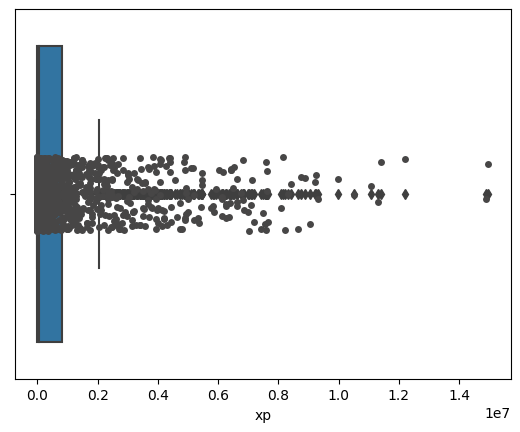

In [19]:
draw_hist_boxplot(df, 'xp')

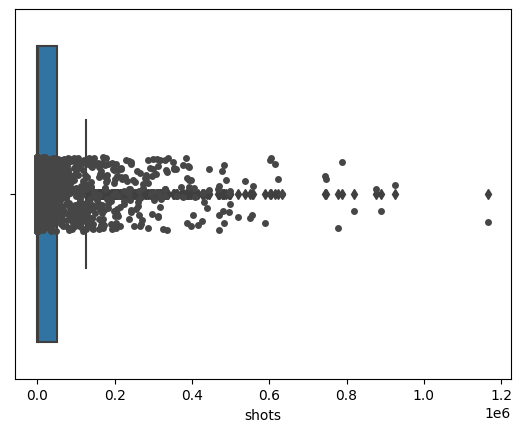

In [20]:
draw_hist_boxplot(df, 'shots')

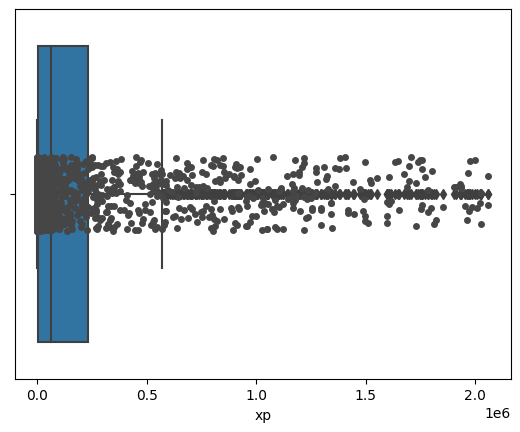

In [21]:
replace_outliers_with_median(df, 'xp')
draw_hist_boxplot(df, 'xp')

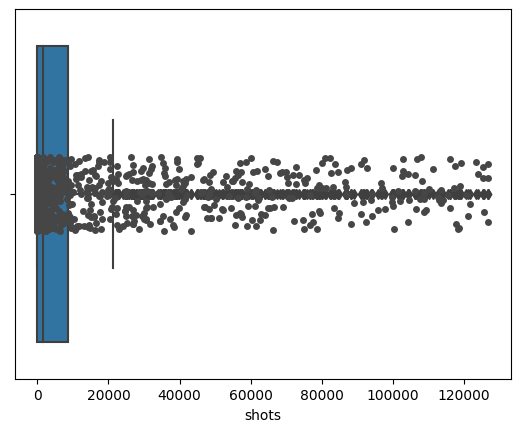

In [22]:
replace_outliers_with_median(df, 'shots')
draw_hist_boxplot(df, 'shots')

In [23]:
x = df.to_numpy()
N = x.shape[0]

In [24]:
# Como se observa una diferencia de magnitud entre las variables, se procede a escalarlas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [25]:
# Detectamos outliers y eliminamos
# Utilizamos el método de Jacknife y el algoritmo K-means
sse = []
for i in range(len(data_scaled)):
  X = np.delete(data_scaled, i, axis=0)
  kmeans = KMeans(n_clusters=4, n_init=10, random_state=100).fit(X)
  sse.append(kmeans.inertia_)

In [26]:
sigma = np.std(sse)
mu = np.mean(sse)
umbral = 2
outliers = []
for i in range(0,N):
  if np.abs(sse[i]-mu) > umbral*sigma:
    outliers.append(i)

In [27]:
outliers

[86,
 133,
 145,
 164,
 186,
 195,
 216,
 235,
 507,
 524,
 708,
 753,
 932,
 965,
 983,
 1095,
 1120,
 1286,
 1313,
 1446,
 1526]

In [29]:
sse = []
for i in range(data_scaled.shape[0]):
    j_indices = [j for j in range(data_scaled.shape[0]) if j != i]
    kmeans_j = KMeans(n_clusters=4, n_init=10, random_state=0).fit(data_scaled[j_indices])
    sse.append(kmeans_j.inertia_)

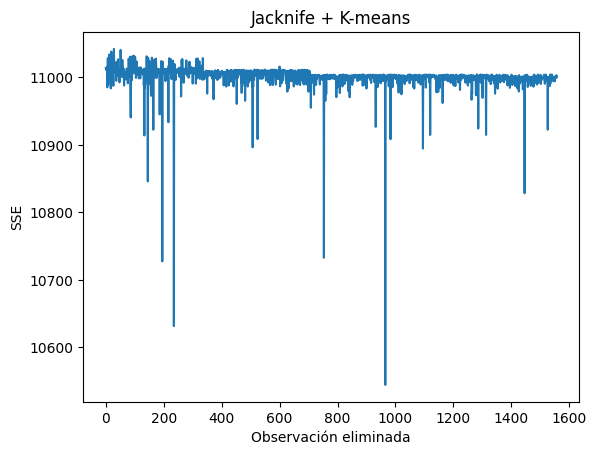

In [31]:
# Graficamos el índice SSE de cada ejecución
plt.plot(sse)
plt.title('Jacknife + K-means')
plt.xlabel('Observación eliminada')
plt.ylabel('SSE')
plt.show()

<ipython-input-33-b5273d12130e>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.columns].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'wins'}>,
        <Axes: title={'center': 'kills'}>,
        <Axes: title={'center': 'kdRatio'}>,
        <Axes: title={'center': 'killstreak'}>],
       [<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'losses'}>,
        <Axes: title={'center': 'prestige'}>,
        <Axes: title={'center': 'hits'}>],
       [<Axes: title={'center': 'timePlayed'}>,
        <Axes: title={'center': 'headshots'}>,
        <Axes: title={'center': 'averageTime'}>,
        <Axes: title={'center': 'gamesPlayed'}>],
       [<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'misses'}>,
        <Axes: title={'center': 'xp'}>,
        <Axes: title={'center': 'scorePerMinute'}>],
       [<Axes: title={'center': 'shots'}>,
        <Axes: title={'center': 'deaths'}>, <Axes: >, <Axes: >]],
      dtype=object)

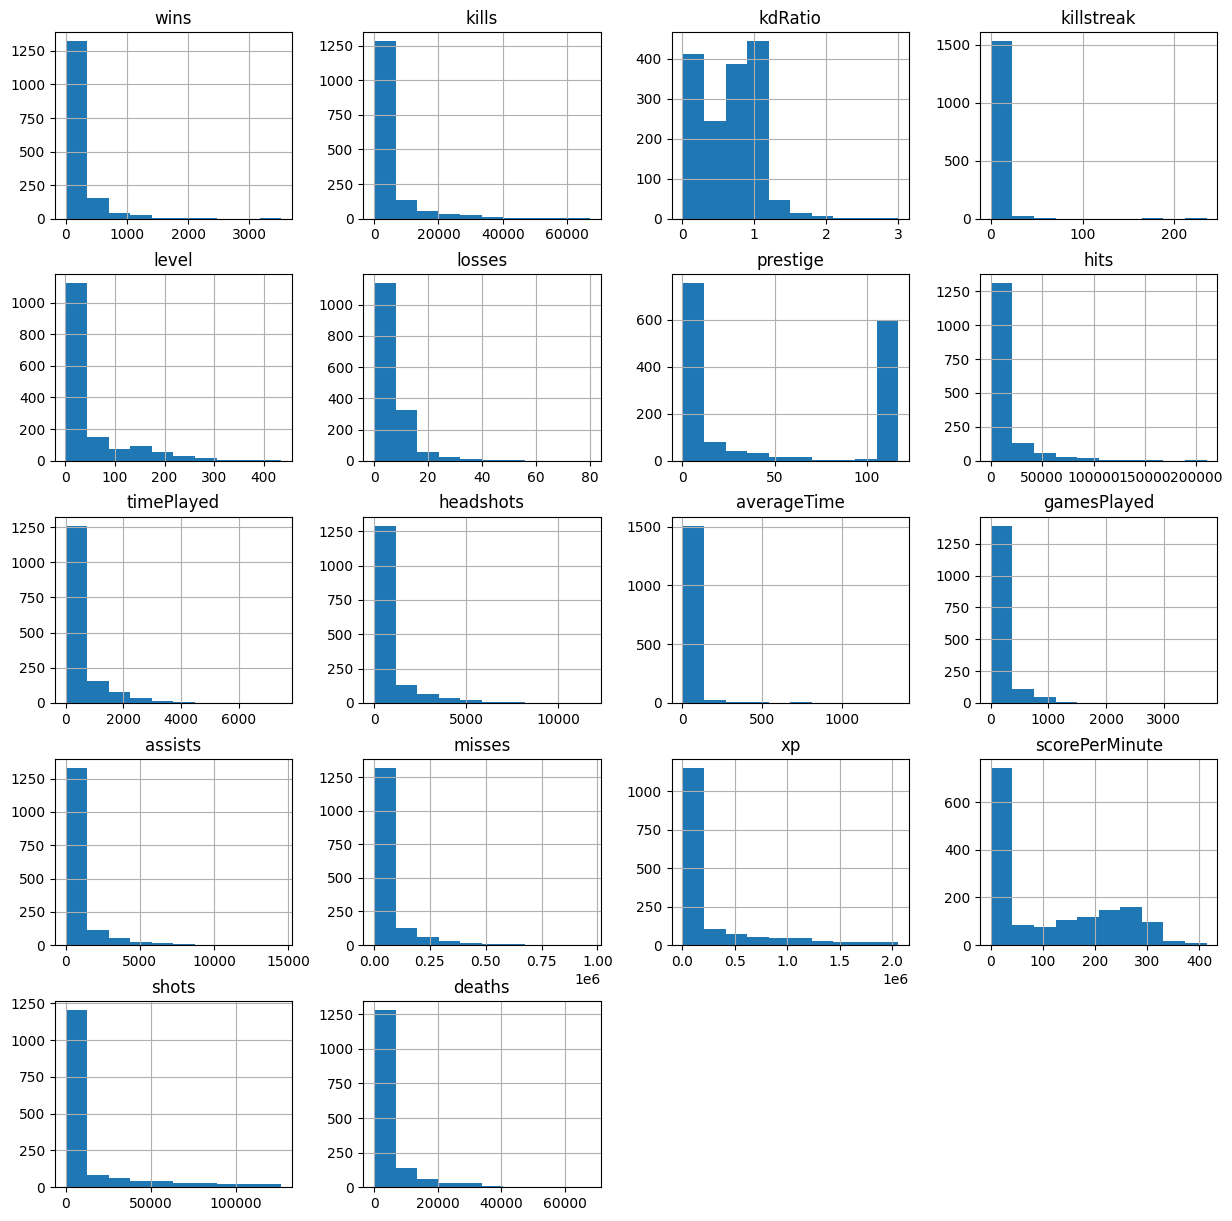

In [33]:
df[df.columns].hist(ax = plt.figure(figsize = (15, 15)).gca())

## **Análisis Cluster**

In [36]:
# Ejecución de análisis cluster con un valor de k concreto y determinar el número de réplicas (n_init)
# que conduce a que la repetición de dicho algoritmo genere la misma solución
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0).fit(data_scaled)
print('Silhouette score:', silhouette_score(data_scaled, kmeans.labels_))
print('Davies-Bouldin score:', davies_bouldin_score(data_scaled, kmeans.labels_))

Silhouette score: 0.40866189212103987
Davies-Bouldin score: 1.243258336049597


In [47]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.46724339, -0.45371343, -0.42509798, -0.43769291, -0.53925314,
        -0.5071855 , -0.36056615, -0.43395137, -0.48617333, -0.46172479,
        -0.01123046, -0.43621107, -0.43110255, -0.44477497, -0.43127355,
        -0.34617068, -0.40776912, -0.45806798],
       [ 3.32584228,  3.83745662,  0.86941537,  1.21053593,  2.88065946,
         1.76209859,  1.02011619,  3.80063923,  3.20904354,  3.70956666,
        -0.22293152,  3.51221342,  3.8264034 ,  3.6528249 , -0.41053379,
         0.85597079, -0.43073923,  3.7922062 ],
       [ 1.51022967,  1.43934421,  0.86886748,  1.11557678,  1.67478204,
         1.4753864 ,  0.75071544,  1.34920839,  1.48709538,  1.46739753,
        -0.20811494,  1.4216324 ,  1.32113801,  1.44832143,  0.4907996 ,
         0.72497802, -0.31576264,  1.43551526],
       [ 0.17463008,  0.07758629,  0.73060108,  0.60861674,  0.39174846,
         0.56977436,  0.56615746,  0.06330927,  0.25875797,  0.1110501 ,
         0.15527821,  0.08920857,  0.06213526,  0.079

## **Numero de grupos**

In [38]:
# Determinar el valor de k (número de grupos) optimizando la función BIC
bic = []
for k in range(2, 10):
    kmeans_k = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data_scaled)
    bic.append(kmeans_k.score(data_scaled) + np.log(data_scaled.shape[0]) * k)

In [39]:
bic

[-16654.371260404023,
 -12356.36274128784,
 -10975.214567657908,
 -9717.819420762742,
 -8543.73624627992,
 -7596.2055576088915,
 -6918.118188586776,
 -6231.469740172957]

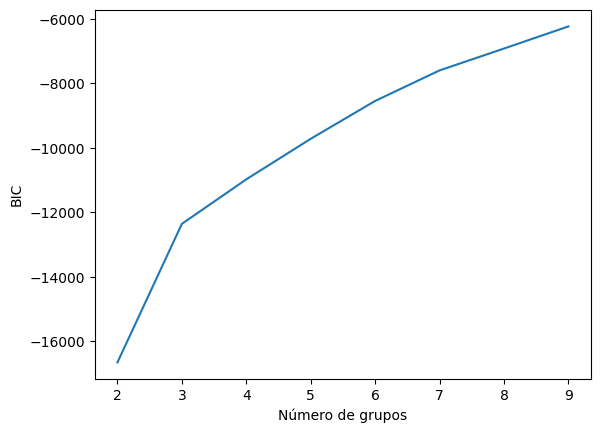

In [40]:
# Se grafica el valor BIC en función del número de grupos
plt.plot(range(2, 10), bic)
plt.xlabel('Número de grupos')
plt.ylabel('BIC')
plt.show()

In [41]:
from sklearn.mixture import GaussianMixture
def get_bic(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return k, gmm.bic(X)

In [42]:
bic_score = pd.DataFrame([get_bic(k, X) for k in range(2, 30)], columns=['k', 'BIC'])

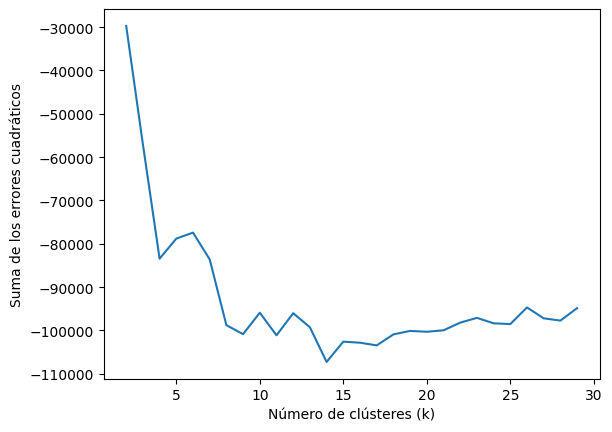

In [43]:
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(bic_score['k'],bic_score['BIC'])

In [50]:
k_optimized = bic_score[bic_score.BIC == bic_score.BIC.min()]
k_optimized

,k,BIC
12,14,-107259.083916


In [51]:
k = k_optimized['k'].values[0]
k

14

## **Análisis - Datos Calculados**

In [53]:
# Ejecución de análisis con los datos calculados (k y n_init)
kmeans_final = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data_scaled)

In [54]:
kmeans_final.cluster_centers_

array([[ 1.55797858e+00,  1.70311842e+00,  8.97193866e-01,
         1.05517581e+00,  1.83301405e+00,  1.53134471e+00,
         7.81223215e-01,  1.58070209e+00,  1.56258680e+00,
         1.67726125e+00, -2.17691541e-01,  1.60419624e+00,
         1.64169677e+00,  1.69020145e+00, -4.10533789e-01,
         7.26018849e-01, -4.30739230e-01,  1.68084938e+00],
       [-4.65385073e-01, -4.46921101e-01, -1.67476158e-01,
        -4.84144921e-01, -4.46451402e-01, -4.94027919e-01,
         1.19236754e+00, -4.42262184e-01, -4.22343978e-01,
        -4.51764325e-01,  3.78489221e-01, -4.44809141e-01,
        -4.24238237e-01, -4.53704900e-01, -3.01642934e-01,
        -7.49908584e-01, -4.46844121e-01, -4.49736533e-01],
       [ 2.86814283e+00,  3.22783011e+00,  8.77514498e-01,
         1.13782114e+00,  2.58558358e+00,  1.77937801e+00,
         9.99866397e-01,  3.14912534e+00,  2.72174833e+00,
         3.17825348e+00, -2.22812940e-01,  2.93985536e+00,
         3.11020082e+00,  2.98541775e+00, -4.10533789e

In [55]:
np.array(kmeans_final.cluster_centers_[0][0])

array(1.55797858)

## **Resultados**

In [57]:
# Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad de
# observaciones de ese grupo y el centroide que representa a ese grupo (valor de cada variable)
# Esta tabla podría ser una tabla de pandas
centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)

In [60]:
import plotly.express as px
labels = kmeans.labels_
df = df.copy()
df['label'] =  labels
fig = px.scatter_3d(df, x='kdRatio', y='wins', z='losses',
              color='label')
fig.show()

In [61]:
group = df.groupby(['label']).count() 
group

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
label,,,,,,,,,,,,,,,,,,
0,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009
1,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
2,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
3,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348


## **Observaciones Grupo 0**

In [63]:
df[df['label'] == 0].head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
name,,,,,,,,,,,,,,,,,,,
RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0
JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700.0,0.0,0.0,16,0
bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300.0,0.0,0.0,64,0
JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150.0,0.0,0.0,5,0
gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000.0,0.0,0.0,10,0


In [64]:
df[df['label'] == 0].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.0
mean,11.947473,156.346878,0.454170,2.439049,7.585728,1.445986,29.048563,372.422200,43.817641,28.245788,20.500628,4.906838,31.428147,1818.540139,54928.741328,67.543654,2190.962339,215.388503,0.0
std,32.122969,319.955439,0.409202,3.675922,11.864514,2.377830,46.578623,907.644856,95.585116,62.060990,54.628321,12.206037,65.174758,4245.628412,112235.059144,108.645775,5122.084964,418.500704,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,2.000000,0.0
50%,0.000000,16.000000,0.428571,0.000000,2.000000,0.000000,0.000000,0.000000,10.000000,3.000000,3.382353,0.000000,1.000000,0.000000,7350.000000,0.000000,0.000000,36.000000,0.0
75%,9.000000,150.000000,0.755876,5.000000,10.000000,2.000000,44.000000,182.000000,46.000000,25.000000,13.909091,3.000000,31.000000,1102.000000,51539.000000,122.263636,1371.000000,236.000000,0.0
max,536.000000,4016.000000,3.000000,18.000000,142.000000,15.000000,113.000000,6176.000000,1243.000000,876.000000,524.000000,145.000000,560.000000,28128.000000,850943.000000,413.800000,32198.000000,4641.000000,0.0


La media indica que los jugadores tienen en promedio 11.95 victorias, 156.35 asesinatos, una relación entre asesinatos y muertes de 0.45, una racha de asesinatos de 2.44, un nivel de 7.59, 1.45 pérdidas, 29.05 prestigios, 43.82 golpes, 28.25 tiempo de juego, 20.50 juegos jugados, 4.91 asistencias, 31.43 disparos fallados, 1818.54 experiencia, 54928.74 puntaje por minuto y 215.39 disparos en la cabeza. La desviación estándar muestra que hay una gran variabilidad en estas variables entre los jugadores en el grupo 0. Los valores mínimo, 25%, 50%, 75% y máximo proporcionan información sobre la distribución de estas variables entre los jugadores en el grupo 0.

## **Observaciones Grupo 1**

In [65]:
df[df['label'] == 1].head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
name,,,,,,,,,,,,,,,,,,,
Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,63968.0,255.672035,1565.0,25321,1
MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,2.826389,864,4029,327230,63968.0,198.844226,1565.0,21032,1
infamousabe84,724,32052,0.968338,20,252,9,112,52056,2802,4250,4.078603,687,3938,336446,63968.0,157.961456,1565.0,33100,1
livernutz#5465911,929,28873,0.917040,14,202,8,69,104830,2130,3666,2.547847,836,6878,453158,63968.0,224.050986,1565.0,31485,1
DStizzy#2268939,1824,34198,1.114704,27,287,13,110,73630,3050,5025,3.841310,794,4501,250976,63968.0,161.607541,1565.0,30679,1


In [66]:
df[df['label'] == 1].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,59.000000,59.0,59.000000,59.0
mean,1157.033898,34173.101695,1.011226,19.220339,241.152542,17.338983,100.305085,97542.457627,2948.000000,5470.661017,3.011268,1016.779661,6493.881356,402924.389831,63968.0,207.580242,1565.0,34175.508475,1.0
std,519.629011,10221.239323,0.142450,5.407746,53.741018,11.655412,25.783752,36511.636918,1213.640789,1821.729196,0.881409,477.331016,2400.629451,150085.133974,0.0,52.137939,0.0,10674.328016,0.0
min,571.000000,17342.000000,0.654390,11.000000,156.000000,7.000000,12.000000,39770.000000,1366.000000,2148.000000,1.843525,487.000000,3052.000000,197269.000000,63968.0,93.650275,1565.0,20820.000000,1.0
25%,824.000000,27504.000000,0.918639,15.500000,201.500000,11.000000,110.000000,73133.500000,2142.500000,4278.500000,2.370625,763.500000,4393.500000,305107.000000,63968.0,172.497970,1565.0,27377.000000,1.0
50%,1057.000000,31153.000000,0.988194,19.000000,234.000000,13.000000,111.000000,88710.000000,2802.000000,5113.000000,2.798527,923.000000,6294.000000,370434.000000,63968.0,212.636772,1565.0,30679.000000,1.0
75%,1216.500000,38709.500000,1.080692,21.000000,263.500000,18.500000,111.000000,112298.500000,3355.000000,6096.000000,3.523681,1114.000000,7382.000000,449249.500000,63968.0,242.655562,1565.0,38661.500000,1.0
max,3519.000000,66935.000000,1.422381,41.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,5.578544,3745.000000,14531.000000,965775.000000,63968.0,330.616205,1565.0,67888.000000,1.0


La media de victorias es de 1157, con un máximo de 3519 y un mínimo de 571.
El número promedio de kills es de 34173, con un máximo de 10221 y un mínimo de 17342.
La relación de bajas/muertes (KD Ratio) promedio es de 1.01, con un máximo de 1.14 y un mínimo de 0.65.
El promedio de killstreaks es de 19, con un máximo de 27 y un mínimo de 11.
El nivel promedio del grupo es 241, con un máximo de 287 y un mínimo de 156.
El promedio de pérdidas es de 17, con un máximo de 29 y un mínimo de 7.
El prestigio promedio del grupo es de 100, con un máximo de 111 y un mínimo de 9.
El promedio de hits es de 97542, con un máximo de 365112 y un mínimo de 39770.
El tiempo promedio de juego es de 2948, con un máximo de 1213 y un mínimo de 1366.
El promedio de headshots es de 5470, con un máximo de 1821 y un mínimo de 2148.
El promedio de tiempo promedio es de 3.01, con un máximo de 0.88 y un mínimo de 1.84.
El promedio de juegos jugados es de 1016, con un máximo de 477 y un mínimo de 3052.
El promedio de asistencias es de 6493, con un máximo de 2400 y un mínimo de 4393.
El promedio de fallos es de 402924, con un máximo de 150085 y un mínimo de 197269.
El promedio de experiencia (XP) es de 63968, con un máximo y mínimo iguales.
El promedio de puntaje por minuto (scorePerMinute) es de 207.58, con un máximo de 242.66 y un mínimo de 93.65.
El promedio de disparos es de 1565, con un máximo y mínimo iguales.
El número de muertes en promedio es de 34175, con un máximo de 10674 y un mínimo de 20820.

## **Observaciones Grupo 2**

In [67]:
df[df['label'] == 2].head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
name,,,,,,,,,,,,,,,,,,,
Nsory_1#5583298,1592,15033,0.780327,17,156,13,111,49680,3247,2367,3.054563,1063,2099,247686,63968.0,230.430305,1565.0,19265,2
DeGiove#5248918,605,7764,0.853281,14,63,8,111,32602,1153,1549,2.638444,437,1106,125227,1050069.0,281.435906,1565.0,9099,2
SharkPawgin#5823839,642,10577,0.851268,14,144,13,14,36028,1182,1585,3.716981,318,2187,147179,63968.0,172.808629,1565.0,12425,2
FaZe Splitter#1010390,504,12870,1.263995,20,141,28,26,21774,1245,2569,1.954474,637,1506,62751,63968.0,295.467470,84525.0,10182,2
Russbuck#9798189,601,12340,0.890203,15,171,13,111,41563,1923,1857,5.183288,371,2639,201235,63968.0,128.001248,1565.0,13862,2


In [68]:
df[df['label'] == 2].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.0
mean,608.922535,15162.901408,1.010990,18.253521,158.795775,15.330986,86.401408,41290.119718,1594.669014,2545.232394,4.235317,481.021127,2691.147887,187129.957746,4.568069e+05,192.320989,4698.246479,15345.309859,2.0
std,247.779789,4727.143211,0.241768,19.166474,53.294118,9.010413,38.715558,15428.037545,670.745946,826.220101,4.377352,207.366721,1083.347138,76230.267914,7.034888e+05,76.226398,14604.031223,4978.433925,0.0
min,222.000000,6224.000000,0.609300,9.000000,63.000000,6.000000,1.000000,6559.000000,457.000000,1129.000000,1.567452,95.000000,825.000000,25157.000000,6.396800e+04,14.001377,1565.000000,6503.000000,2.0
25%,457.750000,11328.750000,0.894325,13.000000,127.000000,10.000000,56.500000,32109.000000,1103.250000,1858.000000,2.360588,339.500000,1955.500000,136873.000000,6.396800e+04,137.766709,1565.000000,11514.500000,2.0
50%,561.500000,14544.000000,0.969781,15.000000,151.500000,12.000000,110.000000,39167.000000,1421.500000,2428.500000,2.838699,460.000000,2486.500000,174161.000000,6.396800e+04,195.844671,1565.000000,14409.000000,2.0
75%,682.750000,18790.250000,1.045985,19.000000,177.000000,17.000000,111.000000,50695.500000,1941.000000,3165.500000,4.084938,585.250000,3339.000000,222786.000000,6.396800e+04,246.485062,1565.000000,18162.750000,2.0
max,1592.000000,28002.000000,2.171183,235.000000,433.000000,53.000000,117.000000,77630.000000,4356.000000,4816.000000,35.414634,1063.000000,5618.000000,558604.000000,2.059531e+06,332.842222,102806.000000,35976.000000,2.0


En cuanto al análisis estadístico, se observa que el grupo 2 tiene un promedio de 608.92 victorias y 15,162.90 muertes. Además, el promedio de KD Ratio es de 1.01, lo que indica que el grupo mata a un poco más de una persona por cada muerte que recibe. El promedio de nivel es 158.80, lo que indica que los jugadores del grupo han avanzado bastante en el juego. El promedio de pérdidas es de 15.33, lo que indica que el grupo pierde aproximadamente una vez por cada seis victorias. El promedio de tiempo jugado es de 41,290.12 segundos, lo que equivale a aproximadamente 11.47 horas. En general, el grupo parece ser bastante competitivo en el juego, con un promedio de KD Ratio y puntaje por minuto bastante altos, y un promedio de victorias considerablemente alto.

## **Observaciones Grupo 3**

In [69]:
df[df['label'] == 3].head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
name,,,,,,,,,,,,,,,,,,,
ahevepluto#3505304,186,1898,0.569628,13,37,7,2,5111,550,485,3.666667,150,488,39978,458269.0,180.379636,45089.0,3332,3
CzarnyDelfinek#9059572,188,1949,1.495779,22,53,4,57,3333,409,536,16.360000,25,150,10511,909543.0,38.630318,13844.0,1303,3
DrunkUnc92#7705654,207,3452,0.697797,10,40,9,110,16134,378,535,2.930233,129,811,104881,530615.0,266.014286,121015.0,4947,3
whoshotghost#1916366,106,3284,0.946125,17,41,11,12,11772,255,501,1.992188,128,532,49715,543830.0,278.644706,61487.0,3471,3
LimpThaDon,190,3033,1.009990,13,37,8,110,9846,421,489,2.520958,167,583,42460,458078.0,152.730641,52306.0,3003,3


In [70]:
df[df['label'] == 3].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,348.0
mean,205.721264,4368.040230,0.951491,13.091954,71.169540,8.988506,76.876437,11782.931034,629.281609,775.563218,34.256488,139.557471,780.112069,53120.097701,7.309424e+05,173.423184,51023.382184,4669.982759,3.0
std,137.878805,2587.334962,0.201075,9.856179,47.957684,5.085424,44.585497,8143.398440,459.642714,490.549787,147.039282,99.800779,506.836731,36157.622380,4.994261e+05,100.872099,36493.191799,2737.604176,0.0
min,0.000000,658.000000,0.483346,0.000000,17.000000,1.000000,0.000000,0.000000,55.000000,95.000000,1.538043,0.000000,17.000000,0.000000,6.396800e+04,0.000000,0.000000,579.000000,3.0
25%,101.000000,2222.500000,0.836115,10.000000,39.000000,6.000000,25.000000,5709.750000,305.750000,371.500000,2.306309,65.750000,395.000000,25449.250000,3.309955e+05,82.995707,22277.000000,2552.250000,3.0
50%,175.000000,3659.500000,0.945156,12.000000,53.000000,8.000000,110.000000,9930.000000,504.500000,655.000000,3.047788,115.500000,675.500000,46484.500000,6.592870e+05,195.386875,46468.000000,3929.500000,3.0
75%,273.750000,6248.500000,1.034935,15.000000,86.250000,10.000000,111.000000,16786.250000,793.250000,1046.250000,7.369453,201.000000,1090.500000,76969.000000,1.077410e+06,261.270508,78370.000000,6553.250000,3.0
max,730.000000,12247.000000,2.437500,179.000000,279.000000,43.000000,114.000000,39633.000000,2634.000000,2628.000000,1349.000000,562.000000,2543.000000,185312.000000,2.027775e+06,413.346108,126854.000000,12456.000000,3.0


La variable "wins" (victorias) tiene un promedio de 205.72 y una desviación estándar de 137.88. El valor mínimo de victorias es 0, lo que indica que algunos jugadores aún no han ganado ninguna partida, mientras que el valor máximo es 730.

La variable "kills" (muertes) tiene un promedio de 4368.04 y una desviación estándar de 2587.33. El valor mínimo de muertes es 658, mientras que el valor máximo es 12247.

La variable "kdRatio" (ratio de bajas/muertes) tiene un promedio de 0.951 y una desviación estándar de 0.201. El valor mínimo de este ratio es 0.48, lo que indica que algunos jugadores tienen más bajas que muertes, mientras que el valor máximo es 1.83.

La variable "level" (nivel) tiene un promedio de 71.17 y una desviación estándar de 47.96. El valor mínimo de nivel es 17, mientras que el valor máximo es 285.

La variable "timePlayed" (tiempo jugado) tiene un promedio de 629.28 y una desviación estándar de 459.64. El valor mínimo de tiempo jugado es 55 segundos, mientras que el valor máximo es 2229 minutos (aproximadamente 37 horas).

La variable "scorePerMinute" (puntuación por minuto) tiene un promedio de 173.42 y una desviación estándar de 100.87. El valor mínimo de puntuación por minuto es 0, lo que indica que algunos jugadores no han logrado puntuar, mientras que el valor máximo es 520.28.